In [1]:
#!pip install statsmodels
#!pip install catboost
#!pip install imblearn
#!pip install xgboost

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import os
import phik
from catboost import CatBoostClassifier, Pool, cv
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder,LabelEncoder,MaxAbsScaler,RobustScaler
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import BorderlineSMOTE,ADASYN,SMOTE,SVMSMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from math import ceil
from numpy.random import RandomState
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [4]:
def heatmap_pearson(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Pearson Correlation Matrix')
    plt.show()

In [5]:
def heatmap_spearman(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Spearman Correlation Matrix')
    plt.show()

In [6]:
def heatmap_phik(df):
    corr = df
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        for item in [f, ax]:
            item.patch.set_visible(False)
    ax = sns.heatmap(corr, mask=mask, square=True,cmap = plt.cm.Blues)
    plt.title('Phik Correlation Matrix')
    plt.show()
    

In [7]:
def bar_charts_categorical(df, feature, target):
    """
    Function that plots the frequency and the importance that a categorical variable has with the target
    """
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation="vertical")
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),labelspacing =1)
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")
    plt.show()
    

In [8]:
def bar_charts_categorical(df, feature, target):
    """
    Function that plots the frequency and the importance that a categorical variable has with the target
    """
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation="vertical")
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),labelspacing =1)
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")
    plt.show()
    

In [9]:
def metrics(y_train, pred_train , y_val, pred_val):
    """
    Function that pritns the classification report and the confusion matrix of the train and validation dataset
    """
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    

In [10]:
def micro_f1_score(y_train, pred_train , y_val, pred_val):
    """
    Function that pritns the micro f1 score of the train and validation dataset
    """
    print('_____________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f1_score(y_train, pred_train, average='micro'))

    print('_____________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(f1_score(y_val, pred_val, average='micro'))
    return f1_score(y_val, pred_val, average='micro')

In [11]:
def best_scale(model,X_train,y_train,X_test,y_test):
    """
    Function that returns a table with the micro f1 score for the different scaler
    """
    standard=StandardScaler().fit(X_train).transform(X_train)
    standardTest=StandardScaler().fit(X_test).transform(X_test)

    minMax=MinMaxScaler().fit(X_train).transform(X_train)
    minMaxTest=MinMaxScaler().fit(X_test).transform(X_test)

    maxAbs=MaxAbsScaler().fit(X_train).transform(X_train)
    maxAbsTest=MaxAbsScaler().fit(X_test).transform(X_test)
        
    robust=RobustScaler().fit(X_train).transform(X_train)
    robustTest=RobustScaler().fit(X_test).transform(X_test)

    sclares=[standard,minMax,maxAbs,robust,X_train]
    sclaresTest=[standardTest,minMaxTest,maxAbsTest,robustTest,X_test]
    
    f_score=[]
    
    for i in range(len(sclares)):
        model.fit(sclares[i],y_train)
        y_pred=model.predict(sclaresTest[i])
        f_score.append(f1_score(y_pred,y_test,average="micro"))
        

    return pd.DataFrame(f_score,index=["Standard","MinMax","MaxAbs","Robust","No Scaler"], columns=["F1 Score"])
    

In [12]:
def roc_curve_plot(model,X_train,X_test,y_test,y_train):
    """
    Function that plots the roc curve for a given model
    """
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model.predict(X_train))
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, model.predict(X_test))
    plt.plot(fpr_train, tpr_train,label="ROC Curve train")
    plt.plot(fpr_test, tpr_test,label="ROC Curve test")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()

In [13]:
original = pd.read_csv("H2.csv")
original.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [14]:
df=original.copy()

In [15]:
df.shape

(79330, 31)

In [16]:
df.replace('       NULL', np.nan, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [18]:
df.isna().sum()

IsCanceled                         0
LeadTime                           0
ArrivalDateYear                    0
ArrivalDateMonth                   0
ArrivalDateWeekNumber              0
ArrivalDateDayOfMonth              0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           4
Babies                             0
Meal                               0
Country                           24
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
DepositType                        0
Agent                           8131
Company                        75641
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
R

In [19]:
df.isna().sum()/len(df)*100

IsCanceled                      0.000000
LeadTime                        0.000000
ArrivalDateYear                 0.000000
ArrivalDateMonth                0.000000
ArrivalDateWeekNumber           0.000000
ArrivalDateDayOfMonth           0.000000
StaysInWeekendNights            0.000000
StaysInWeekNights               0.000000
Adults                          0.000000
Children                        0.005042
Babies                          0.000000
Meal                            0.000000
Country                         0.030253
MarketSegment                   0.000000
DistributionChannel             0.000000
IsRepeatedGuest                 0.000000
PreviousCancellations           0.000000
PreviousBookingsNotCanceled     0.000000
ReservedRoomType                0.000000
AssignedRoomType                0.000000
BookingChanges                  0.000000
DepositType                     0.000000
Agent                          10.249590
Company                        95.349805
DaysInWaitingLis

In [20]:
#95% de null
df.drop('Company',axis=1, inplace=True)

In [21]:
#Tem demasiadas variaveis categoricas
df.drop('ReservationStatusDate',axis=1,inplace=True)

In [22]:
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,AssignedRoomType,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,6,2015,July,27,1,0,2,1,0.0,...,A,0,No Deposit,6,0,Transient,0.00,0,0,Check-Out
1,1,88,2015,July,27,1,0,4,2,0.0,...,A,0,No Deposit,9,0,Transient,76.50,0,1,Canceled
2,1,65,2015,July,27,1,0,4,1,0.0,...,A,0,No Deposit,9,0,Transient,68.00,0,1,Canceled
3,1,92,2015,July,27,1,2,4,2,0.0,...,A,0,No Deposit,9,0,Transient,76.50,0,2,Canceled
4,1,100,2015,July,27,2,0,2,2,0.0,...,A,0,No Deposit,9,0,Transient,76.50,0,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,A,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out
79326,0,102,2017,August,35,31,2,5,3,0.0,...,E,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out
79327,0,34,2017,August,35,31,2,5,2,0.0,...,D,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out
79328,0,109,2017,August,35,31,2,5,2,0.0,...,A,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out


In [23]:
categorical = df.select_dtypes(include="object").columns.to_list()
numerical = df.columns.drop(categorical).drop("IsCanceled").to_list()

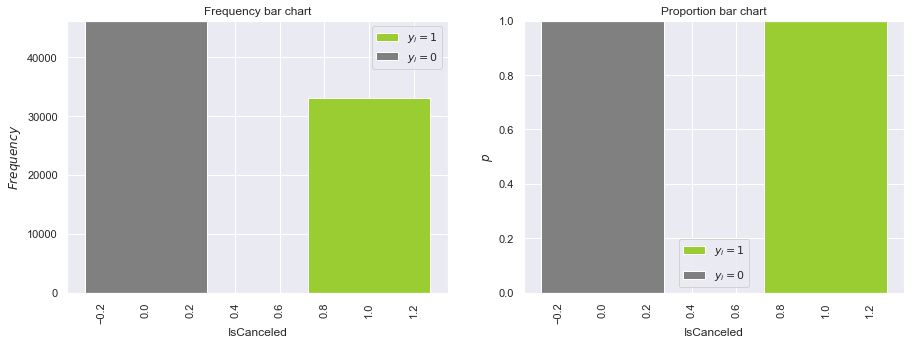

In [134]:
bar_charts_categorical(df,"IsCanceled", 'IsCanceled')

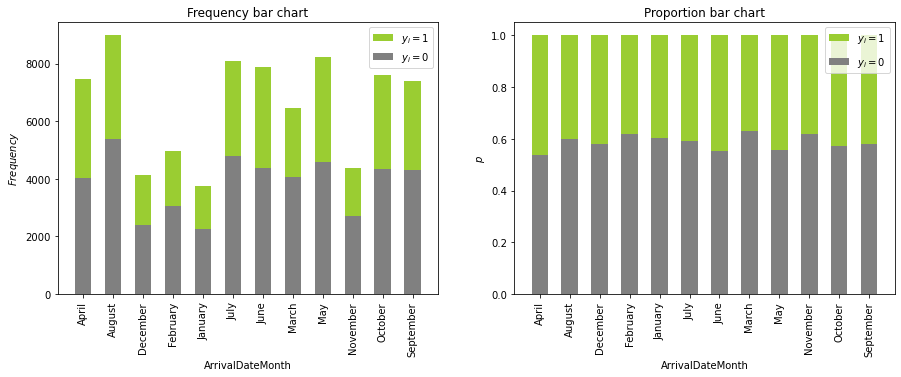

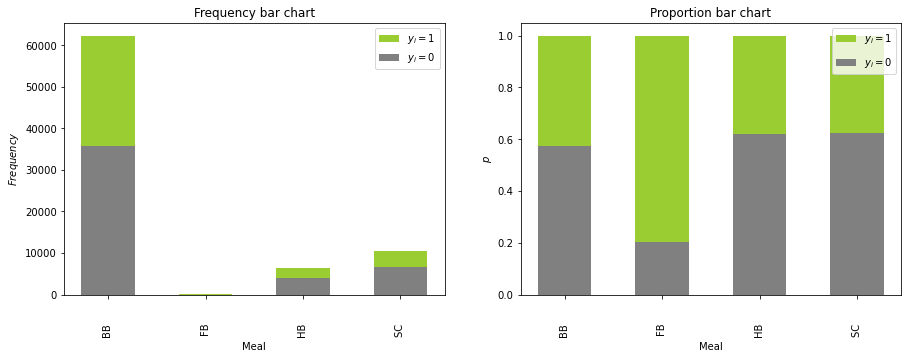

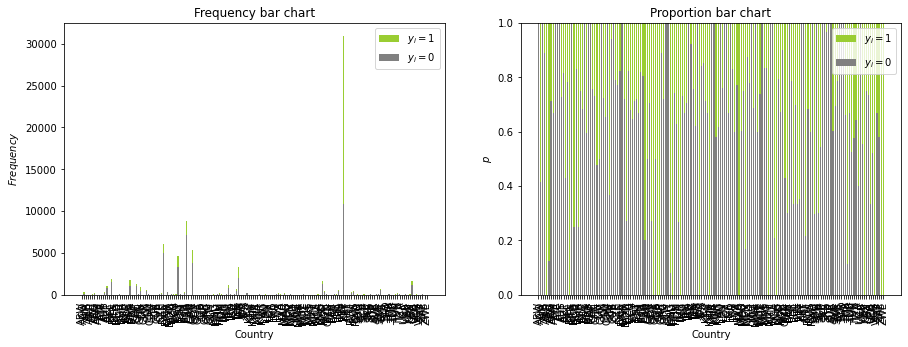

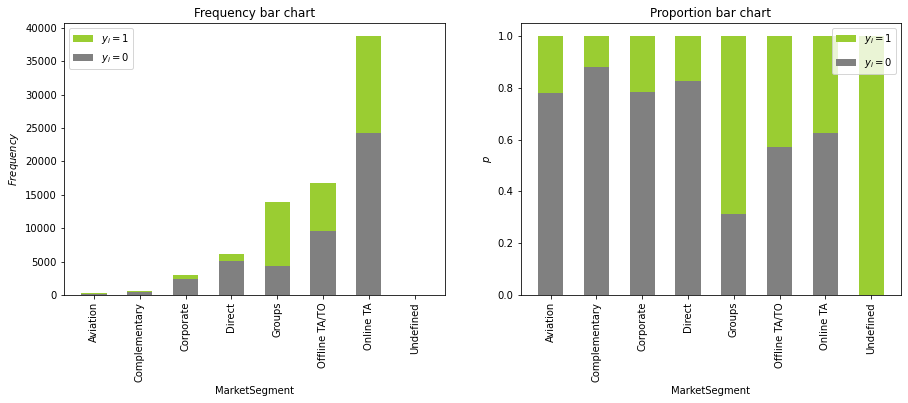

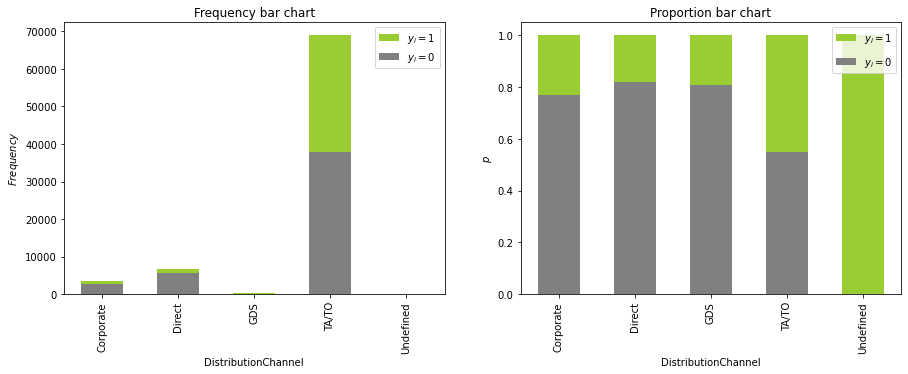

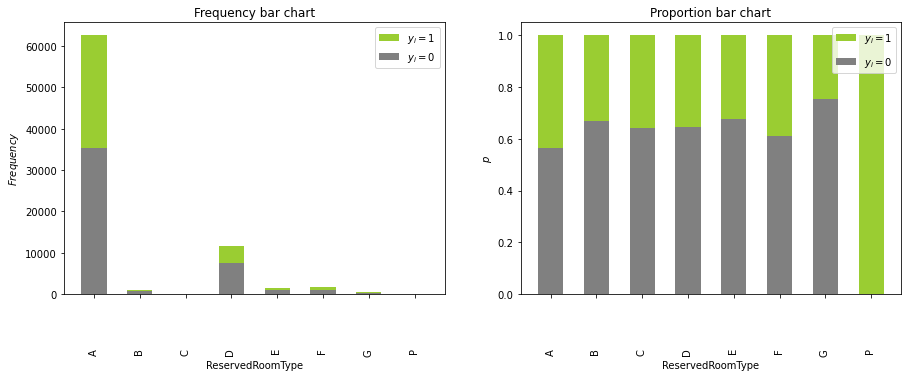

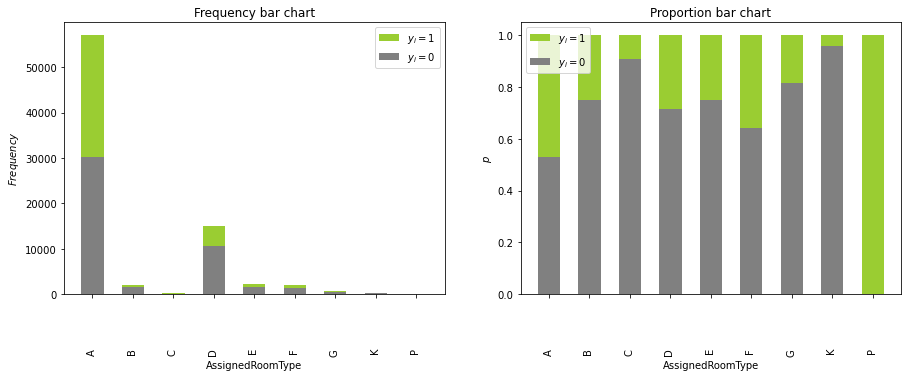

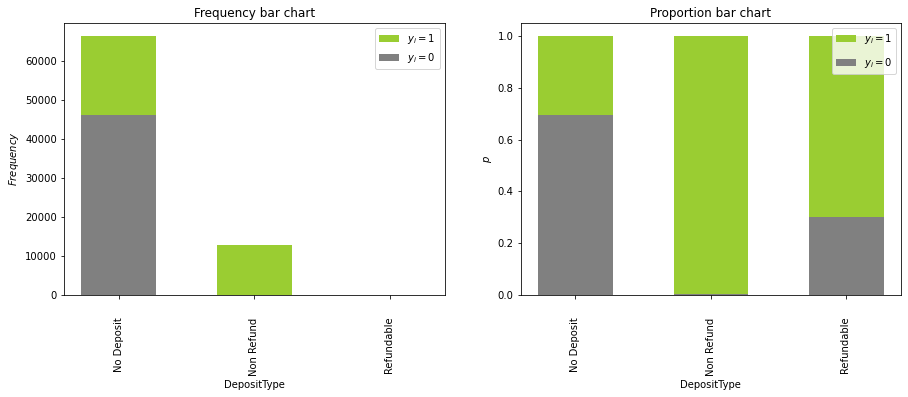

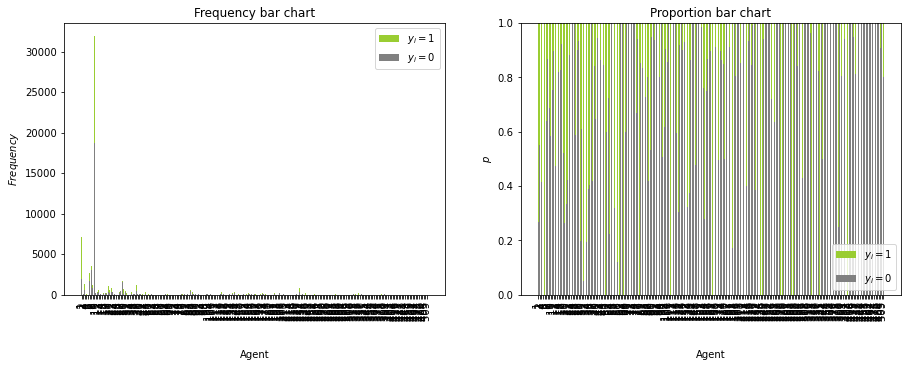

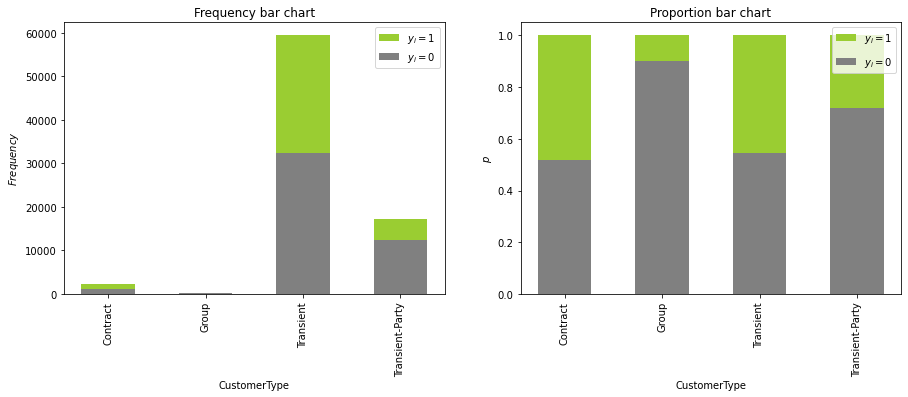

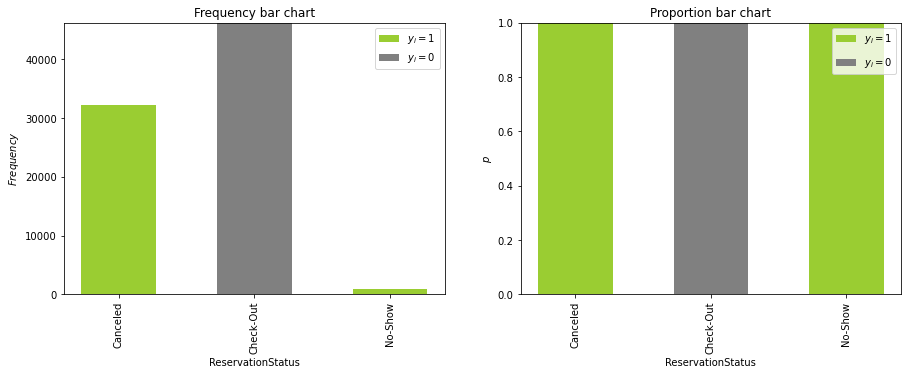

In [24]:
for i in categorical:   
    bar_charts_categorical(df, i, "IsCanceled")

In [25]:
#Demasiadas categorias
df.drop('Country', axis=1, inplace=True)
df.drop('Agent', axis=1, inplace=True)

In [26]:
#muitas variavies categoricas e transmitem todas a msm informação
df.drop(['ReservedRoomType','AssignedRoomType'],axis=1,inplace=True)

In [27]:
df.drop('ReservationStatus',axis=1,inplace=True)

### Feature Engineering

In [28]:
df['ArrivalDateSeason'] = df['ArrivalDateMonth']

In [29]:
season= {'January':'Winter', 'February': 'Winter', 'March': 'Spring','April':'Spring','May':'Spring','June':'Summer','July':'Summer','August':'Summer', 'September':'Autumn','October':'Autumn','November': 'Autumn', 'December': 'Winter'}

In [30]:
df.ArrivalDateSeason.replace(season,inplace=True)

In [31]:
df.drop('ArrivalDateMonth',axis=1,inplace=True)

In [32]:
categorical = df.select_dtypes(include="object").columns.to_list()
numerical = df.columns.drop(categorical).drop("IsCanceled").to_list()

In [33]:
df[categorical]

,Meal,MarketSegment,DistributionChannel,DepositType,CustomerType,ArrivalDateSeason
0,HB,Offline TA/TO,TA/TO,No Deposit,Transient,Summer
1,BB,Online TA,TA/TO,No Deposit,Transient,Summer
2,BB,Online TA,TA/TO,No Deposit,Transient,Summer
3,BB,Online TA,TA/TO,No Deposit,Transient,Summer
4,BB,Online TA,TA/TO,No Deposit,Transient,Summer
...,...,...,...,...,...,...
79325,BB,Offline TA/TO,TA/TO,No Deposit,Transient,Summer
79326,BB,Online TA,TA/TO,No Deposit,Transient,Summer
79327,BB,Online TA,TA/TO,No Deposit,Transient,Summer
79328,BB,Online TA,TA/TO,No Deposit,Transient,Summer


In [34]:
len(numerical)

17

In [35]:
numerical.remove(numerical[9])

In [36]:
len(numerical)

16

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>6 - Data Visualization and Feature Engineering for Numerical Features</font> <a class="anchor" id="sixth-bullet"></a>
    
</div>

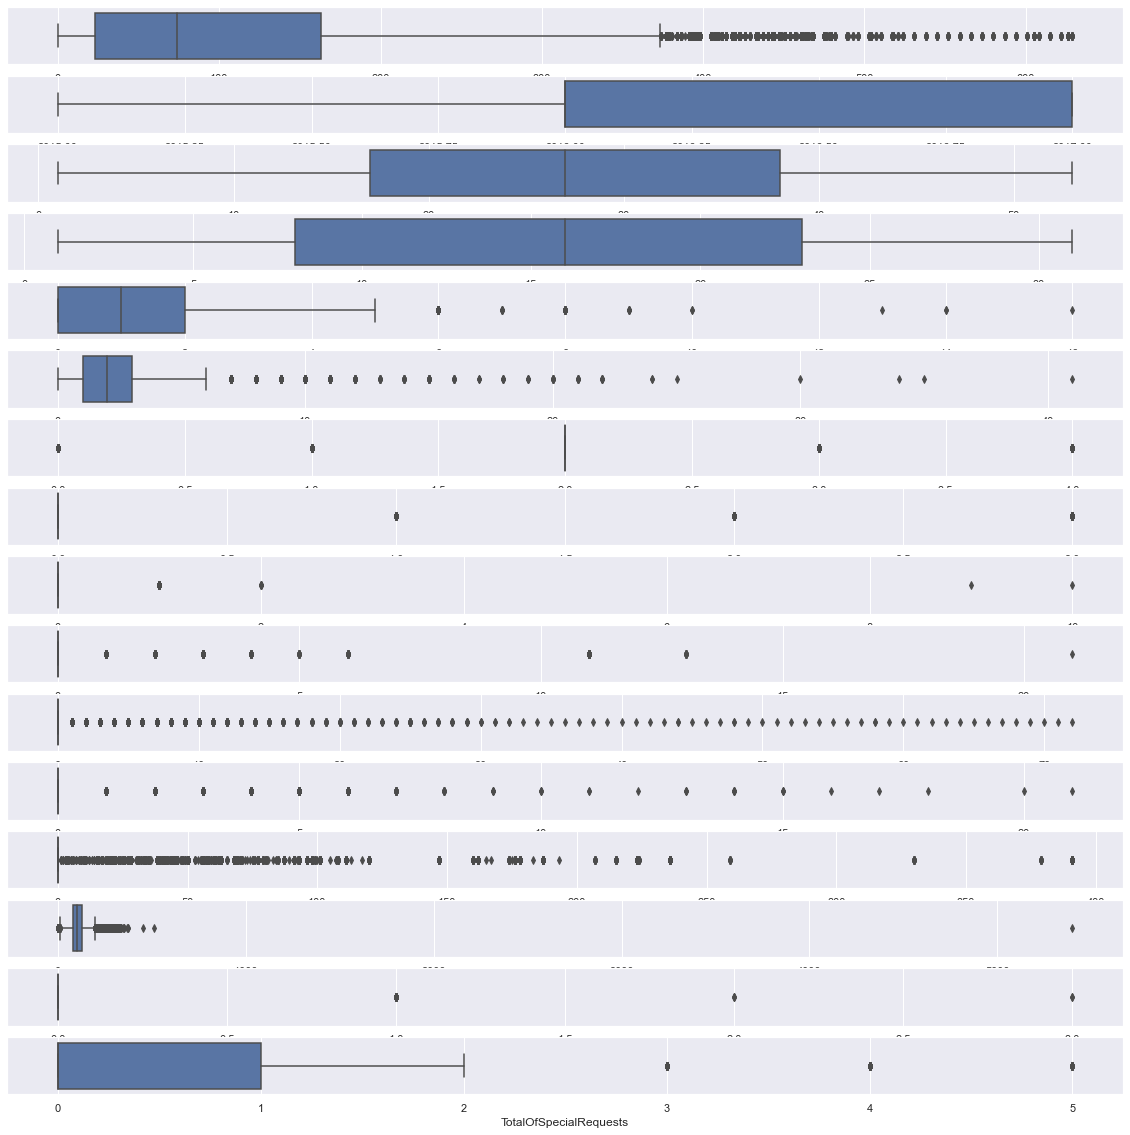

In [37]:
sns.set()
fig, axes = plt.subplots(len(numerical), ceil(len(numerical) / len(numerical)), figsize=(20, 20))
for ax, feat in zip(axes.flatten(), numerical):
    sns.boxplot(x=df[feat], ax=ax) 
plt.show()

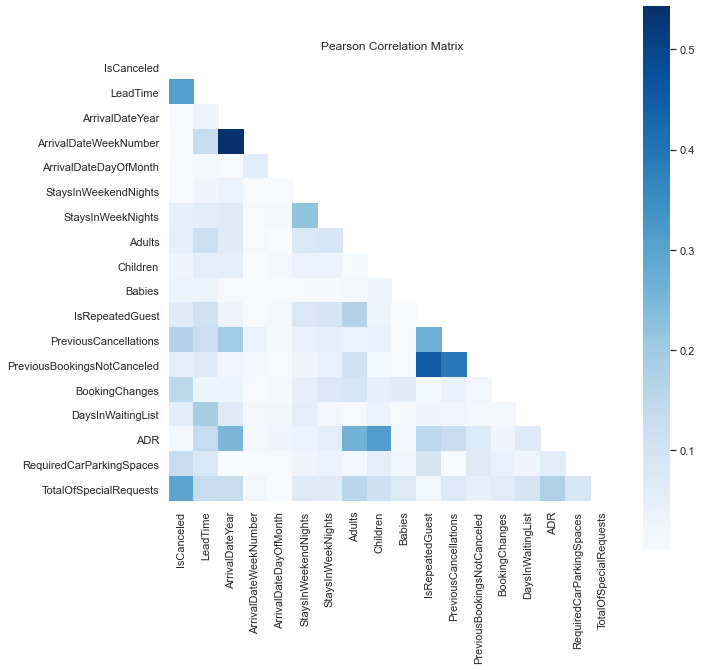

In [38]:
heatmap_pearson(df.corr(method='pearson').abs())

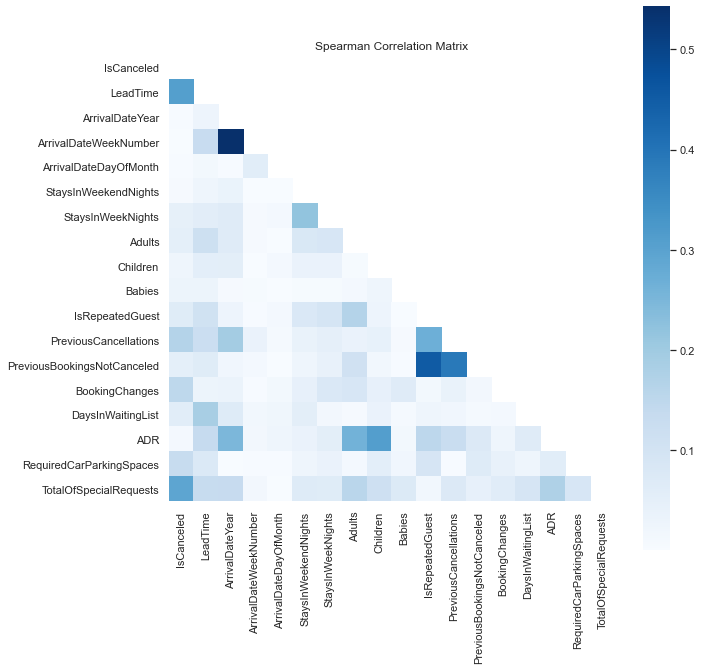

In [135]:
heatmap_spearman(df.corr(method='pearson').abs())

interval columns not set, guessing: ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']


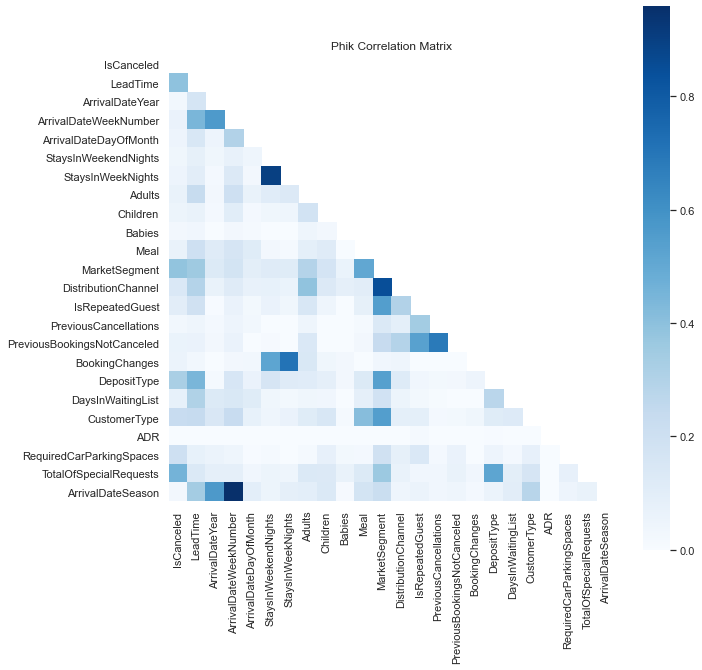

In [39]:
heatmap_phik(df.phik_matrix().abs())

<div class="alert alert-block alert-info">

### Data Imputation
    
</div>

In [40]:
df.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       4
Babies                         0
Meal                           0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ArrivalDateSeason              0
dtype: int64

In [41]:
imputer = KNNImputer(n_neighbors=4)
metric_features = df.columns.to_list()
df[numerical] = imputer.fit_transform(df[numerical])

In [42]:
df.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ArrivalDateSeason              0
dtype: int64

## Outliers

#### Isolation Forest

In [143]:
data_central = df.copy()

In [144]:
iso = IsolationForest(contamination=0.01)
iso_df = iso.fit_predict(data_central[numerical])

In [145]:
mask_out =iso_df == -1
outliers_if=data_central[mask_out]
data_central.drop(outliers_if.index,inplace=True)

In [146]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 1.001 %


#### Minimum Covariance Determinant

In [147]:
ee = EllipticEnvelope(contamination=0.019)
ee_df = ee.fit_predict(data_central[numerical])

In [148]:
mask_out =ee_df == -1
outliers_mcd=data_central[mask_out]
data_central.drop(outliers_mcd.index,inplace=True)

In [149]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 2.883 %


#### PCA Visualization of outliers

In [150]:
df_pca = df.copy()

In [151]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca[numerical])
pca_feat  # What is this output?

array([[-9.69016129e+01, -1.11713905e+02, -2.42087610e+00, ...,
        -9.64084765e-03, -1.55475996e-02, -3.06741108e-03],
       [-1.99835369e+01, -3.01368448e+01, -3.35479861e+00, ...,
         1.71974639e-01, -3.15044631e-02, -9.99064996e-03],
       [-4.23802324e+01, -4.00930411e+01, -2.76598199e+00, ...,
         2.95985723e-01, -2.68498291e-02, -8.38455874e-03],
       ...,
       [-7.88253890e+01,  4.77084591e+01,  8.56945634e-01, ...,
         2.79163148e-01, -5.74615215e-02, -2.55690970e-02],
       [-6.50774614e-01, -6.76528542e-01, -3.09683778e+00, ...,
        -7.35814273e-02,  1.18377530e-02,  3.72758709e-03],
       [ 9.21081918e+01,  5.21586982e+01, -5.29351109e+00, ...,
         2.32952827e-01, -8.41167921e-03, -8.48442294e-03]])

In [152]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,12370.807508,0.000000,8.297023e-01,0.829702
2,1860.263325,-10510.544183,1.247667e-01,0.954469
3,418.948423,-1441.314902,2.809861e-02,0.982568
4,176.789502,-242.158921,1.185716e-02,0.994425
5,75.599803,-101.189698,5.070431e-03,0.999495
6,2.877591,-72.722212,1.929982e-04,0.999688
7,2.161458,-0.716132,1.449677e-04,0.999833
8,0.729202,-1.432256,4.890712e-05,0.999882
9,0.589575,-0.139627,3.954243e-05,0.999922
10,0.374184,-0.215391,2.509630e-05,0.999947


In [153]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(df_pca[numerical])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

,PC0,PC1
0,-96.901613,-111.713905
1,-19.983537,-30.136845
2,-42.380232,-40.093041
3,-15.996137,-29.876333
4,-8.017631,-29.366896
...,...,...
79325,-85.886271,-14.432178
79326,-15.309648,119.617044
79327,-78.825389,47.708459
79328,-0.650775,-0.676529


In [154]:
outliers = list(outliers_mcd.index.tolist() + outliers_if.index.tolist())

def is_out(x):
    if x in outliers:
        return 'Outlier'
    else:
        return 'Not Outlier'

pca_df['OUTLIER'] = pca_df.reset_index().iloc[:,0].apply(is_out)

In [155]:
pca_df.describe(include='all')

,PC0,PC1,OUTLIER
count,7.933000e+04,7.933000e+04,79330
unique,NaN,NaN,2
top,NaN,NaN,Not Outlier
freq,NaN,NaN,77043
mean,-3.668704e-16,2.934963e-15,NaN
std,1.112241e+02,4.313077e+01,NaN
min,-4.107086e+02,-1.124371e+02,NaN
25%,-8.722383e+01,-2.630833e+01,NaN
50%,-3.581035e+01,-4.708927e+00,NaN
75%,5.327027e+01,2.060557e+01,NaN


Text(0, 0.5, 'Dim 2 (12.5%)')

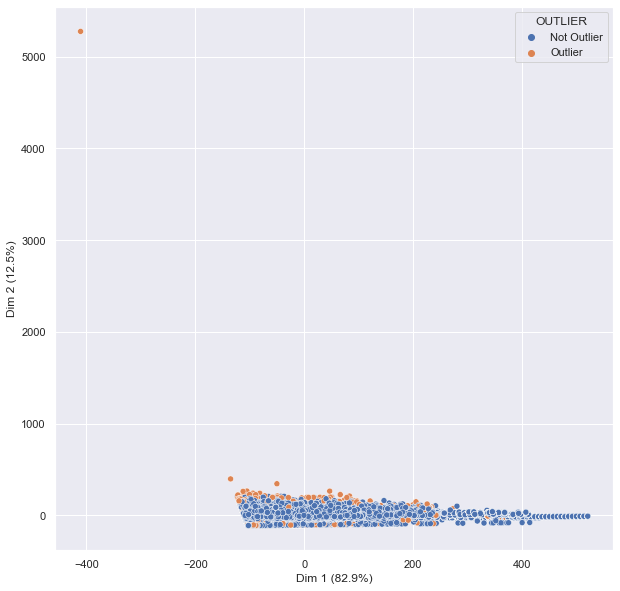

In [156]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_df, x="PC0", y="PC1", hue='OUTLIER')
plt.xlabel('Dim 1 (82.9%)')
plt.ylabel('Dim 2 (12.5%)')

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Catboost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

In [77]:
df[categorical]

,Meal,MarketSegment,DistributionChannel,DepositType,CustomerType,ArrivalDateSeason
0,HB,Offline TA/TO,TA/TO,No Deposit,Transient,Summer
1,BB,Online TA,TA/TO,No Deposit,Transient,Summer
2,BB,Online TA,TA/TO,No Deposit,Transient,Summer
3,BB,Online TA,TA/TO,No Deposit,Transient,Summer
4,BB,Online TA,TA/TO,No Deposit,Transient,Summer
...,...,...,...,...,...,...
79325,BB,Offline TA/TO,TA/TO,No Deposit,Transient,Summer
79326,BB,Online TA,TA/TO,No Deposit,Transient,Summer
79327,BB,Online TA,TA/TO,No Deposit,Transient,Summer
79328,BB,Online TA,TA/TO,No Deposit,Transient,Summer


In [78]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'Meal', 'MarketSegment',
       'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DepositType',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ArrivalDateSeason'],
      dtype='object')

### Separating X and Y

In [79]:
X=df.drop(["IsCanceled"],axis=1)
y=df.loc[:,"IsCanceled"]
categorical=X.select_dtypes(include="object").columns.to_list()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model

In [81]:
cat = CatBoostClassifier(iterations=100,cat_features=categorical)
cat.fit(X_train,y_train)

Learning rate set to 0.5
0:	learn: 0.4846051	total: 115ms	remaining: 11.4s
1:	learn: 0.4486189	total: 176ms	remaining: 8.65s
2:	learn: 0.4276851	total: 241ms	remaining: 7.8s
3:	learn: 0.4025065	total: 301ms	remaining: 7.23s
4:	learn: 0.3951792	total: 361ms	remaining: 6.85s
5:	learn: 0.3918092	total: 427ms	remaining: 6.69s
6:	learn: 0.3874945	total: 498ms	remaining: 6.61s
7:	learn: 0.3829773	total: 555ms	remaining: 6.39s
8:	learn: 0.3816122	total: 605ms	remaining: 6.12s
9:	learn: 0.3777768	total: 660ms	remaining: 5.94s
10:	learn: 0.3761815	total: 712ms	remaining: 5.76s
11:	learn: 0.3740143	total: 769ms	remaining: 5.64s
12:	learn: 0.3720872	total: 821ms	remaining: 5.49s
13:	learn: 0.3710684	total: 874ms	remaining: 5.37s
14:	learn: 0.3704349	total: 924ms	remaining: 5.24s
15:	learn: 0.3699462	total: 990ms	remaining: 5.2s
16:	learn: 0.3690762	total: 1.05s	remaining: 5.11s
17:	learn: 0.3681871	total: 1.11s	remaining: 5.06s
18:	learn: 0.3670712	total: 1.18s	remaining: 5.02s
19:	learn: 0.36608

### Feature Selection

In [82]:
importances = cat.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

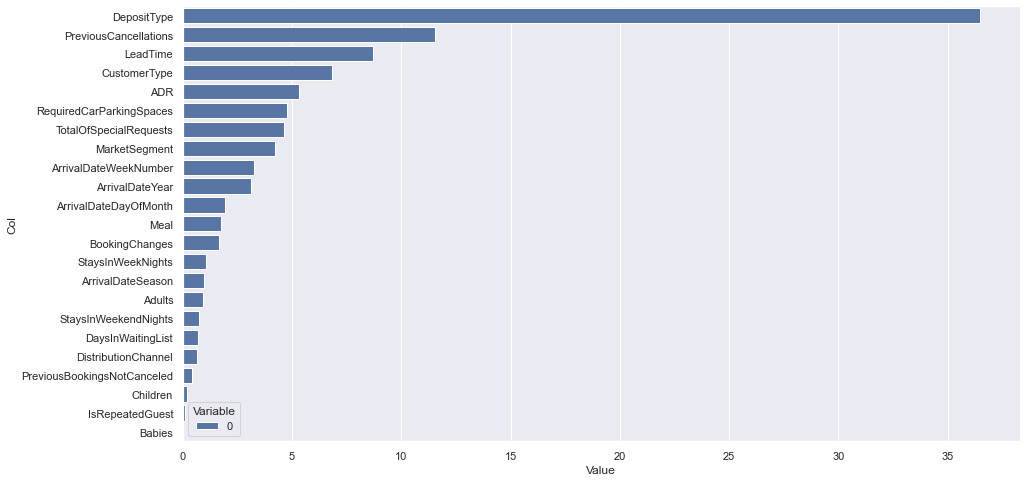

In [83]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [84]:
X.columns

Index(['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'Meal', 'MarketSegment',
       'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DepositType',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ArrivalDateSeason'],
      dtype='object')

In [85]:
X_cat=X.loc[:,['DepositType','PreviousCancellations','LeadTime','CustomerType','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests','MarketSegment','ArrivalDateWeekNumber','ArrivalDateYear','ArrivalDateDayOfMonth','Meal','BookingChanges','StaysInWeekNights','ArrivalDateSeason','Adults']]

### Data Split after feature selection

In [86]:
categorical=X_cat.select_dtypes(include="object").columns.to_list()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [111]:
cat = CatBoostClassifier(iterations=300,cat_features=categorical,verbose=100)
cat.fit(X_train,y_train)

Learning rate set to 0.182849
0:	learn: 0.5608338	total: 65.1ms	remaining: 19.5s
100:	learn: 0.3461177	total: 6.49s	remaining: 12.8s
200:	learn: 0.3262937	total: 13.3s	remaining: 6.53s
299:	learn: 0.3128036	total: 20.6s	remaining: 0us


In [112]:
y_train_pred= cat.predict(X_train)
y_test_pred=cat.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     36982
           1       0.88      0.76      0.82     26482

    accuracy                           0.86     63464
   macro avg       0.86      0.85      0.85     63464
weighted avg       0.86      0.86      0.86     63464

[[34315  2667]
 [ 6250 20232]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

##### ROC curve

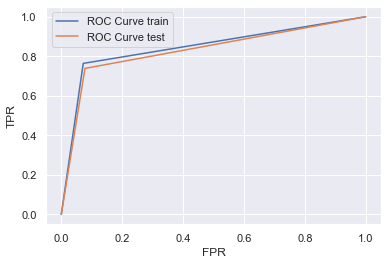

In [113]:
roc_curve_plot(cat,X_train,X_test,y_test,y_train)

### Grid Search Cv

In [90]:
#max_depth_range=[5,6,7] 
#min_samples_leaf_range=[8,9,10,11]
#max_features_range=[12,15,17]
#n_estimators_range=[100,300,500]
#random_state_range=[20,35,70]

In [91]:
#param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
#grid=GridSearchCV(estimator=gb,param_grid=param_grid, cv =5)

In [92]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Catboost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

In [77]:
df[categorical]

,Meal,MarketSegment,DistributionChannel,DepositType,CustomerType,ArrivalDateSeason
0,HB,Offline TA/TO,TA/TO,No Deposit,Transient,Summer
1,BB,Online TA,TA/TO,No Deposit,Transient,Summer
2,BB,Online TA,TA/TO,No Deposit,Transient,Summer
3,BB,Online TA,TA/TO,No Deposit,Transient,Summer
4,BB,Online TA,TA/TO,No Deposit,Transient,Summer
...,...,...,...,...,...,...
79325,BB,Offline TA/TO,TA/TO,No Deposit,Transient,Summer
79326,BB,Online TA,TA/TO,No Deposit,Transient,Summer
79327,BB,Online TA,TA/TO,No Deposit,Transient,Summer
79328,BB,Online TA,TA/TO,No Deposit,Transient,Summer


In [78]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'Meal', 'MarketSegment',
       'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DepositType',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ArrivalDateSeason'],
      dtype='object')

### Separating X and Y

In [79]:
X=df.drop(["IsCanceled"],axis=1)
y=df.loc[:,"IsCanceled"]
categorical=X.select_dtypes(include="object").columns.to_list()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model

In [81]:
cat = CatBoostClassifier(iterations=100,cat_features=categorical)
cat.fit(X_train,y_train)

Learning rate set to 0.5
0:	learn: 0.4846051	total: 115ms	remaining: 11.4s
1:	learn: 0.4486189	total: 176ms	remaining: 8.65s
2:	learn: 0.4276851	total: 241ms	remaining: 7.8s
3:	learn: 0.4025065	total: 301ms	remaining: 7.23s
4:	learn: 0.3951792	total: 361ms	remaining: 6.85s
5:	learn: 0.3918092	total: 427ms	remaining: 6.69s
6:	learn: 0.3874945	total: 498ms	remaining: 6.61s
7:	learn: 0.3829773	total: 555ms	remaining: 6.39s
8:	learn: 0.3816122	total: 605ms	remaining: 6.12s
9:	learn: 0.3777768	total: 660ms	remaining: 5.94s
10:	learn: 0.3761815	total: 712ms	remaining: 5.76s
11:	learn: 0.3740143	total: 769ms	remaining: 5.64s
12:	learn: 0.3720872	total: 821ms	remaining: 5.49s
13:	learn: 0.3710684	total: 874ms	remaining: 5.37s
14:	learn: 0.3704349	total: 924ms	remaining: 5.24s
15:	learn: 0.3699462	total: 990ms	remaining: 5.2s
16:	learn: 0.3690762	total: 1.05s	remaining: 5.11s
17:	learn: 0.3681871	total: 1.11s	remaining: 5.06s
18:	learn: 0.3670712	total: 1.18s	remaining: 5.02s
19:	learn: 0.36608

### Feature Selection

In [82]:
importances = cat.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

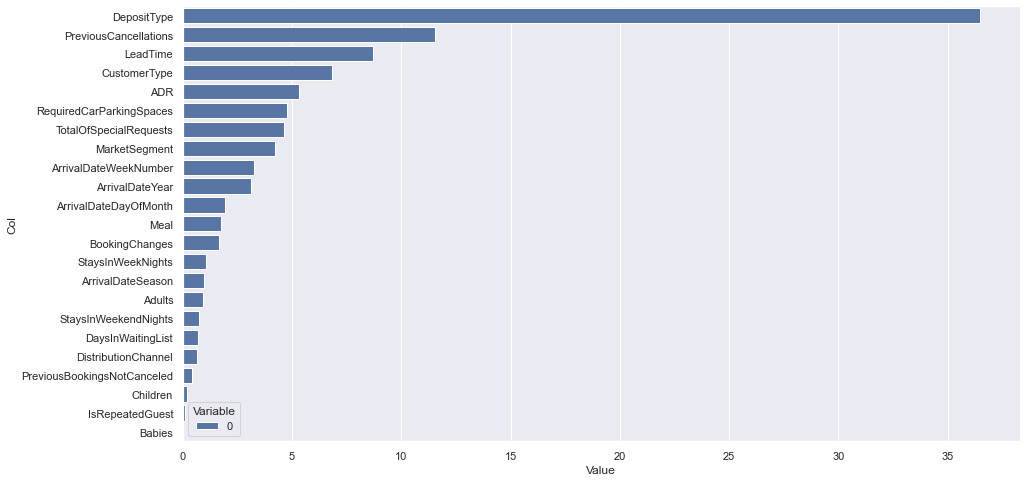

In [83]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [84]:
X.columns

Index(['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'Meal', 'MarketSegment',
       'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DepositType',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ArrivalDateSeason'],
      dtype='object')

In [85]:
X_cat=X.loc[:,['DepositType','PreviousCancellations','LeadTime','CustomerType','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests','MarketSegment','ArrivalDateWeekNumber','ArrivalDateYear','ArrivalDateDayOfMonth','Meal','BookingChanges','StaysInWeekNights','ArrivalDateSeason','Adults']]

### Data Split after feature selection

In [86]:
categorical=X_cat.select_dtypes(include="object").columns.to_list()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [111]:
cat = CatBoostClassifier(iterations=300,cat_features=categorical,verbose=100)
cat.fit(X_train,y_train)

Learning rate set to 0.182849
0:	learn: 0.5608338	total: 65.1ms	remaining: 19.5s
100:	learn: 0.3461177	total: 6.49s	remaining: 12.8s
200:	learn: 0.3262937	total: 13.3s	remaining: 6.53s
299:	learn: 0.3128036	total: 20.6s	remaining: 0us


In [112]:
y_train_pred= cat.predict(X_train)
y_test_pred=cat.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     36982
           1       0.88      0.76      0.82     26482

    accuracy                           0.86     63464
   macro avg       0.86      0.85      0.85     63464
weighted avg       0.86      0.86      0.86     63464

[[34315  2667]
 [ 6250 20232]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

##### ROC curve

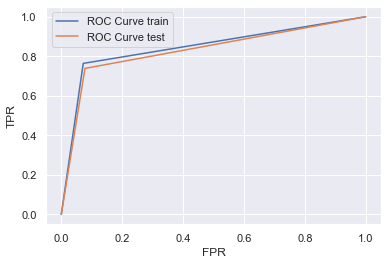

In [113]:
roc_curve_plot(cat,X_train,X_test,y_test,y_train)

### Grid Search Cv

In [90]:
#max_depth_range=[5,6,7] 
#min_samples_leaf_range=[8,9,10,11]
#max_features_range=[12,15,17]
#n_estimators_range=[100,300,500]
#random_state_range=[20,35,70]

In [91]:
#param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
#grid=GridSearchCV(estimator=gb,param_grid=param_grid, cv =5)

In [92]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>7 - Applying One Hot Encoder</font> <a class="anchor" id="seventh-bullet"></a>
    
</div>

In [194]:
df[categorical]

,Meal,MarketSegment,DistributionChannel,DepositType,CustomerType,ArrivalDateSeason
0,HB,Offline TA/TO,TA/TO,No Deposit,Transient,Summer
1,BB,Online TA,TA/TO,No Deposit,Transient,Summer
2,BB,Online TA,TA/TO,No Deposit,Transient,Summer
3,BB,Online TA,TA/TO,No Deposit,Transient,Summer
4,BB,Online TA,TA/TO,No Deposit,Transient,Summer
...,...,...,...,...,...,...
79325,BB,Offline TA/TO,TA/TO,No Deposit,Transient,Summer
79326,BB,Online TA,TA/TO,No Deposit,Transient,Summer
79327,BB,Online TA,TA/TO,No Deposit,Transient,Summer
79328,BB,Online TA,TA/TO,No Deposit,Transient,Summer


### Separating X and Y

In [195]:
X=df.drop(["IsCanceled"],axis=1)
y=df.loc[:,"IsCanceled"]
categorical=X.select_dtypes(include="object").columns.to_list()

### One Hot Encoder

In [196]:
df_ohc = X.copy()
categorical=X.select_dtypes(include="object").columns.to_list()
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc[categorical])
ohc_feat_names = ohc.get_feature_names(categorical)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
# Reassigning df to contain ohc variables
df_ohc = pd.concat([ohc_df,df_ohc.drop(columns=categorical)], axis=1)
X=df_ohc.copy()
X.head()

,Meal_BB,Meal_FB,Meal_HB,Meal_SC,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,...,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,76.5,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,68.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,76.5,0.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,76.5,0.0,1.0


In [197]:
X.columns

Index(['Meal_BB       ', 'Meal_FB       ', 'Meal_HB       ', 'Meal_SC       ',
       'MarketSegment_Aviation', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'MarketSegment_Undefined',
       'DistributionChannel_Corporate', 'DistributionChannel_Direct',
       'DistributionChannel_GDS', 'DistributionChannel_TA/TO',
       'DistributionChannel_Undefined', 'DepositType_No Deposit     ',
       'DepositType_Non Refund     ', 'DepositType_Refundable     ',
       'CustomerType_Contract', 'CustomerType_Group', 'CustomerType_Transient',
       'CustomerType_Transient-Party', 'ArrivalDateSeason_Autumn',
       'ArrivalDateSeason_Spring', 'ArrivalDateSeason_Summer',
       'ArrivalDateSeason_Winter', 'LeadTime', 'ArrivalDateYear',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Childre

In [198]:
X.drop(['Meal_HB       ','MarketSegment_Undefined','DepositType_Non Refund     ','DistributionChannel_Undefined','CustomerType_Group','ArrivalDateSeason_Winter'],axis=1,inplace=True)

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>Gradient Boost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

### 8.1 - Data Splitting

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

### Model

In [163]:
gb = GradientBoostingClassifier() 
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [164]:
best_scale(gb,X_train,y_train,X_test,y_test)

,F1 Score
Standard,0.817597
MinMax,0.810538
MaxAbs,0.810538
Robust,0.818102
No Scaler,0.818165


### Feature Selection

In [165]:
importances = gb.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

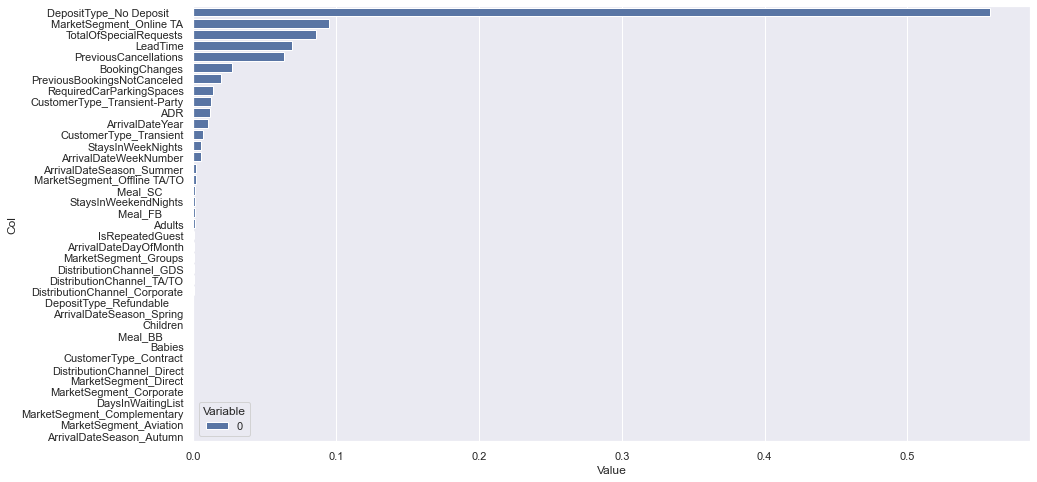

In [166]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [167]:
X.columns

Index(['Meal_BB       ', 'Meal_FB       ', 'Meal_SC       ',
       'MarketSegment_Aviation', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'DistributionChannel_Corporate',
       'DistributionChannel_Direct', 'DistributionChannel_GDS',
       'DistributionChannel_TA/TO', 'DepositType_No Deposit     ',
       'DepositType_Refundable     ', 'CustomerType_Contract',
       'CustomerType_Transient', 'CustomerType_Transient-Party',
       'ArrivalDateSeason_Autumn', 'ArrivalDateSeason_Spring',
       'ArrivalDateSeason_Summer', 'LeadTime', 'ArrivalDateYear',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParki

In [168]:
X_gb=X.loc[:,["DepositType_No Deposit     ", 'MarketSegment_Online TA','TotalOfSpecialRequests','LeadTime','PreviousCancellations','BookingChanges','PreviousBookingsNotCanceled','RequiredCarParkingSpaces','ADR','CustomerType_Transient-Party','StaysInWeekNights','ArrivalDateWeekNumber','ArrivalDateSeason_Summer']]

In [169]:
X_gb

,DepositType_No Deposit,MarketSegment_Online TA,TotalOfSpecialRequests,LeadTime,PreviousCancellations,BookingChanges,PreviousBookingsNotCanceled,RequiredCarParkingSpaces,ADR,CustomerType_Transient-Party,StaysInWeekNights,ArrivalDateWeekNumber,ArrivalDateSeason_Summer
0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0,27.0,1.0
1,1.0,1.0,1.0,88.0,0.0,0.0,0.0,0.0,76.50,0.0,4.0,27.0,1.0
2,1.0,1.0,1.0,65.0,0.0,0.0,0.0,0.0,68.00,0.0,4.0,27.0,1.0
3,1.0,1.0,2.0,92.0,0.0,0.0,0.0,0.0,76.50,0.0,4.0,27.0,1.0
4,1.0,1.0,1.0,100.0,0.0,0.0,0.0,0.0,76.50,0.0,2.0,27.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,1.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,96.14,0.0,5.0,35.0,1.0
79326,1.0,1.0,2.0,102.0,0.0,0.0,0.0,0.0,225.43,0.0,5.0,35.0,1.0
79327,1.0,1.0,4.0,34.0,0.0,0.0,0.0,0.0,157.71,0.0,5.0,35.0,1.0
79328,1.0,1.0,0.0,109.0,0.0,0.0,0.0,0.0,104.40,0.0,5.0,35.0,1.0


###  Data Split after feature selection


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_gb, y, train_size=0.8, random_state=42,stratify=y,shuffle=True) 

In [171]:
gb = GradientBoostingClassifier(n_estimators=100,max_features=10,random_state=70,max_depth=5,min_samples_leaf=9) 
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, max_features=10, min_samples_leaf=9,
                           random_state=70)

In [172]:
y_train_pred= gb.predict(X_train)
y_test_pred=gb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.93      0.86     36982
           1       0.87      0.69      0.77     26482

    accuracy                           0.83     63464
   macro avg       0.84      0.81      0.82     63464
weighted avg       0.83      0.83      0.83     63464

[[34235  2747]
 [ 8085 18397]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

##### ROC curve

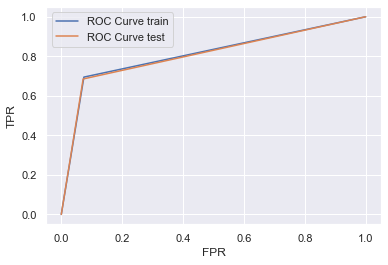

In [173]:
roc_curve_plot(gb,X_train,X_test,y_test,y_train)

### Cross-Validation

In [174]:
#cv_results = cross_validate(gb, X_train,y_train, cv=5, scoring=["accuracy"])
#gb_cross_f1=cv_results["accuracy"].mean()
#gb_cross_f1

### Grid Search Cv

In [175]:
#max_depth_range=[5,6,7] 
#min_samples_leaf_range=[8,9,10,11]
#max_features_range=[12,15,17]
#n_estimators_range=[100,300,500]
#random_state_range=[20,35,70]

In [176]:
#param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
#grid=GridSearchCV(estimator=gb,param_grid=param_grid, cv =5)

In [177]:
#grid.fit(X_train,y_train)
#grid.best_params_

<div class="alert alert-block alert-info">
    
## <font color='#E8800A'>xGBoost Classifier</font> <a class="anchor" id="eighth-bullet"></a>
    
</div>

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 

In [200]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[15:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [201]:
best_scale(xgb,X_train,y_train,X_test,y_test)

[15:01:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,F1 Score
Standard,0.842809
MinMax,0.809467
MaxAbs,0.809467
Robust,0.845834
No Scaler,0.848418


### Feature Selection

In [202]:
importances = xgb.feature_importances_
indices = np.argsort(importances)

<AxesSubplot:xlabel='Value', ylabel='Col'>

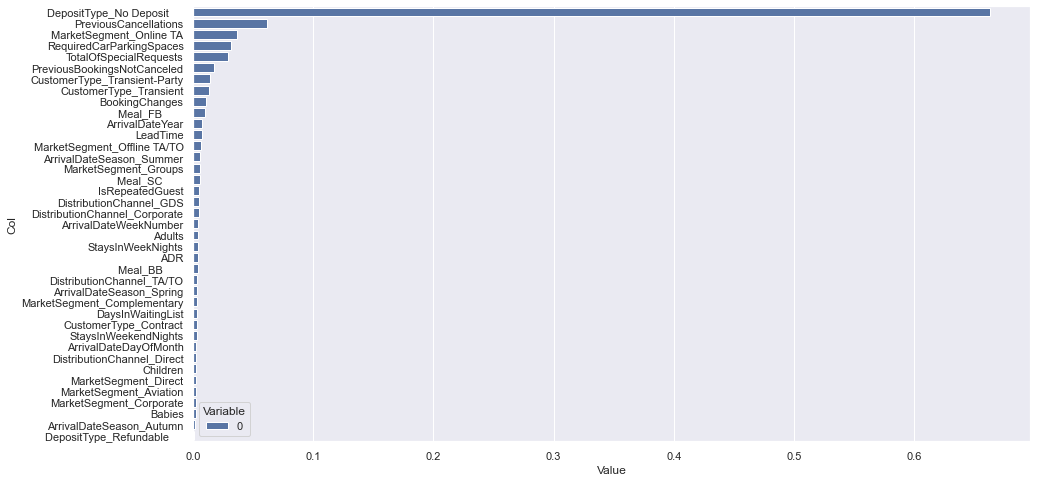

In [203]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [204]:
zippy.sort_values(by=0,ascending=False)

,0,col
14,0.663322,DepositType_No Deposit
32,0.061796,PreviousCancellations
9,0.036481,MarketSegment_Online TA
37,0.031915,RequiredCarParkingSpaces
38,0.029039,TotalOfSpecialRequests
33,0.017330,PreviousBookingsNotCanceled
18,0.014232,CustomerType_Transient-Party
17,0.013142,CustomerType_Transient
34,0.010480,BookingChanges
1,0.009870,Meal_FB


In [205]:
X_xgb=X[zippy.sort_values(by=0,ascending=False).head(15)['col']]

In [206]:
X_xgb.columns

Index(['DepositType_No Deposit     ', 'PreviousCancellations',
       'MarketSegment_Online TA', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'PreviousBookingsNotCanceled',
       'CustomerType_Transient-Party', 'CustomerType_Transient',
       'BookingChanges', 'Meal_FB       ', 'ArrivalDateYear', 'LeadTime',
       'MarketSegment_Offline TA/TO', 'ArrivalDateSeason_Summer',
       'MarketSegment_Groups'],
      dtype='object')

#### Data Split after Feature Selection

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X_xgb, y, train_size=0.8, random_state=42)

In [208]:
xgb = XGBClassifier(max_depth=5, min_samples_leaf=8)
xgb.fit(X_train,y_train)

[15:02:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:02:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_leaf=8, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [209]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     36957
           1       0.86      0.72      0.78     26507

    accuracy                           0.83     63464
   macro avg       0.84      0.82      0.82     63464
weighted avg       0.84      0.83      0.83     63464

[[33792  3165]
 [ 7405 19102]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

##### Grid Search

In [210]:
max_depth_range=[5,6,7]
min_samples_leaf_range=[8,9,10,11]
max_features_range=[12,15,17]
n_estimators_range=[100,300,500]
random_state_range=[20,35,70]
param_grid=dict(max_depth=max_depth_range,min_samples_leaf=min_samples_leaf_range)
grid=GridSearchCV(estimator=xgb,param_grid=param_grid, cv =5)

In [211]:
#grid.fit(X_train,y_train)
#grid.best_params_

In [212]:
xgb = XGBClassifier(max_depth=7, min_samples_leaf=8)
xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

[15:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:02:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
--------------------------------------------------------------------------------

##### ROC curve

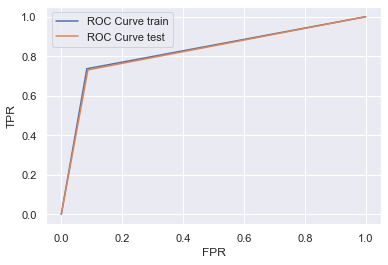

In [213]:
roc_curve_plot(xgb,X_train,X_test,y_test,y_train)